In [69]:
import numpy as np
import pandas as pd
# from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
# import sklearn

In [70]:
import os

---

In [71]:
train  = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

train = train.drop(['index'],axis = 1)
test =test.drop(['index'],axis = 1)

In [72]:
concat_features = train

mask = concat_features.introelapse > (concat_features.introelapse.quantile(0.75) + 1.5 * (concat_features.introelapse.quantile(0.75) - concat_features.introelapse.quantile(0.25)))
concat_features.introelapse[mask] = concat_features.introelapse.quantile(0.75)

mask = concat_features.testelapse > (concat_features.testelapse.quantile(0.75) + 1.5 * (concat_features.testelapse.quantile(0.75) - concat_features.testelapse.quantile(0.25)))
concat_features.testelapse[mask] = concat_features.testelapse.quantile(0.75)

mask = concat_features.surveyelapse > (concat_features.surveyelapse.quantile(0.75) + 1.5 * (concat_features.surveyelapse.quantile(0.75) - concat_features.surveyelapse.quantile(0.25)))
concat_features.surveyelapse[mask] = concat_features.surveyelapse.quantile(0.75)

train = concat_features



concat_features = test

mask = concat_features.introelapse > (concat_features.introelapse.quantile(0.75) + 1.5 * (concat_features.introelapse.quantile(0.75) - concat_features.introelapse.quantile(0.25)))
concat_features.introelapse[mask] = concat_features.introelapse.quantile(0.75)

mask = concat_features.testelapse > (concat_features.testelapse.quantile(0.75) + 1.5 * (concat_features.testelapse.quantile(0.75) - concat_features.testelapse.quantile(0.25)))
concat_features.testelapse[mask] = concat_features.testelapse.quantile(0.75)

mask = concat_features.surveyelapse > (concat_features.surveyelapse.quantile(0.75) + 1.5 * (concat_features.surveyelapse.quantile(0.75) - concat_features.surveyelapse.quantile(0.25)))
concat_features.surveyelapse[mask] = concat_features.surveyelapse.quantile(0.75)

test = concat_features


In [73]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(train[name], prefix = name)
    train = pd.concat([train, mergedata], axis=1)
    train = train.drop([name], axis = 1)

In [74]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(test[name], prefix = name)
    test = pd.concat([test, mergedata], axis=1)
    test = test.drop([name], axis = 1)

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 94 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Q1             14959 non-null  float64
 1   Q2             14931 non-null  float64
 2   Q3             14950 non-null  float64
 3   Q4             14929 non-null  float64
 4   Q5             14962 non-null  float64
 5   Q6             14952 non-null  float64
 6   Q7             14924 non-null  float64
 7   Q8             14952 non-null  float64
 8   Q9             14944 non-null  float64
 9   Q10            14928 non-null  float64
 10  Q11            14941 non-null  float64
 11  Q12            14933 non-null  float64
 12  Q13            14960 non-null  float64
 13  Q14            14964 non-null  float64
 14  Q15            14955 non-null  float64
 15  Q16            14967 non-null  float64
 16  Q17            14963 non-null  float64
 17  Q18            14937 non-null  float64
 18  Q19   

<AxesSubplot: >

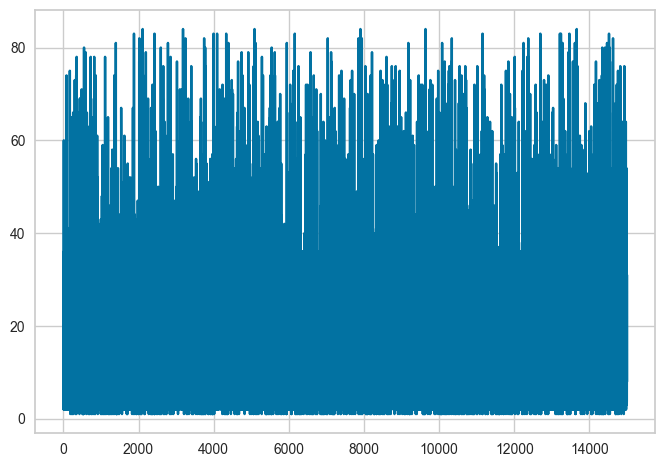

In [76]:
train.introelapse.plot()

In [77]:
train['Ex'] = train['TIPI1']-train['TIPI6']
train['Ag'] = train['TIPI7']-train['TIPI2']
train['Con'] = train['TIPI3']-train['TIPI8']
train['Es'] =train['TIPI9']-train['TIPI4']
train['Op'] =train['TIPI5']-train['TIPI10']

In [78]:
test['Ex'] = test['TIPI1']-test['TIPI6']
test['Ag'] = test['TIPI7']-test['TIPI2']
test['Con'] = test['TIPI3']-test['TIPI8']
test['Es'] =test['TIPI9']-test['TIPI4']
test['Op'] =test['TIPI5']-test['TIPI10']

In [79]:
train = train.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

test = test.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

In [80]:
from sklearn.preprocessing import LabelEncoder
ex = LabelEncoder()

con5 = train.country.value_counts().keys()[:5]

for i in range(train.count().max()):
    if(train.country.values[i] not in con5):
        train.country.values[i] = "X"

for i in range(test.count().max()):
    if(test.country.values[i] not in con5):
        test.country.values[i] = "X"

train.country = ex.fit_transform(train.country)

test.country = ex.fit_transform(test.country)

---

In [81]:
# pip install pycaret

In [82]:
from pycaret.classification import *

model = setup(data = train, target = 'nerdiness',use_gpu=True,session_id=2023)

,Description,Value
0,session_id,2023
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 89)"
5,Missing Values,True
6,Numeric Features,38
7,Categorical Features,50
8,Ordinal Features,False
9,High Cardinality Features,False


In [83]:
# best_3 = compare_models(sort = 'AUC', n_select = 3)

In [84]:
Top3 = compare_models(sort='Accuracy',n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7723,0.8609,0.8320,0.7764,0.8032,0.5338,0.5358,1.4930
rf,Random Forest Classifier,0.7697,0.8561,0.8393,0.7695,0.8028,0.5273,0.5303,1.0970
catboost,CatBoost Classifier,0.7569,0.8259,0.8216,0.7620,0.7906,0.5019,0.5040,7.3920
xgboost,Extreme Gradient Boosting,0.7540,0.8189,0.8102,0.7638,0.7863,0.4971,0.4983,1.3040
lightgbm,Light Gradient Boosting Machine,0.7485,0.8165,0.8155,0.7542,0.7836,0.4844,0.4866,1.9210
gbc,Gradient Boosting Classifier,0.7307,0.7997,0.8001,0.7393,0.7685,0.4480,0.4501,4.8230
ridge,Ridge Classifier,0.7305,0.0000,0.7970,0.7406,0.7677,0.4480,0.4498,0.0800
lda,Linear Discriminant Analysis,0.7303,0.7941,0.7972,0.7402,0.7675,0.4473,0.4492,0.4980
lr,Logistic Regression,0.7293,0.7952,0.7899,0.7422,0.7652,0.4464,0.4477,5.3020
ada,Ada Boost Classifier,0.7198,0.7905,0.7854,0.7324,0.7579,0.4263,0.4280,1.7470


In [85]:
tuned_top3 = [tune_model(i) for i in Top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7819,0.8603,0.8416,0.7841,0.8118,0.5533,0.5552
1,0.7752,0.8576,0.8262,0.7835,0.8043,0.5408,0.5418
2,0.7581,0.8413,0.8058,0.7716,0.7883,0.5064,0.5071
3,0.7362,0.8273,0.8038,0.7441,0.7728,0.4595,0.4614
4,0.7390,0.8176,0.8020,0.7484,0.7743,0.4659,0.4675
5,0.7762,0.8442,0.8515,0.7713,0.8094,0.5400,0.5439
6,0.7648,0.8286,0.8055,0.7802,0.7926,0.5210,0.5214
7,0.7381,0.8109,0.8089,0.7441,0.7751,0.4629,0.4652
8,0.7505,0.8422,0.7867,0.7709,0.7787,0.4928,0.4929


In [86]:
# best_1 = compare_models(sort = 'AUC', n_select = 1)

In [87]:
blended = blend_models(estimator_list=tuned_top3,fold=5,method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7695,0.8460,0.8329,0.7723,0.8015,0.5277,0.5299
1,0.7543,0.8219,0.8286,0.7552,0.7902,0.4952,0.4983
2,0.7595,0.8242,0.8321,0.7601,0.7945,0.5062,0.5092
3,0.7576,0.8174,0.8285,0.7592,0.7923,0.5026,0.5054
4,0.7766,0.8400,0.8328,0.7814,0.8063,0.5430,0.5445
Mean,0.7635,0.8299,0.8310,0.7657,0.7970,0.5149,0.5175
Std,0.0083,0.0111,0.0020,0.0097,0.0060,0.0177,0.0171


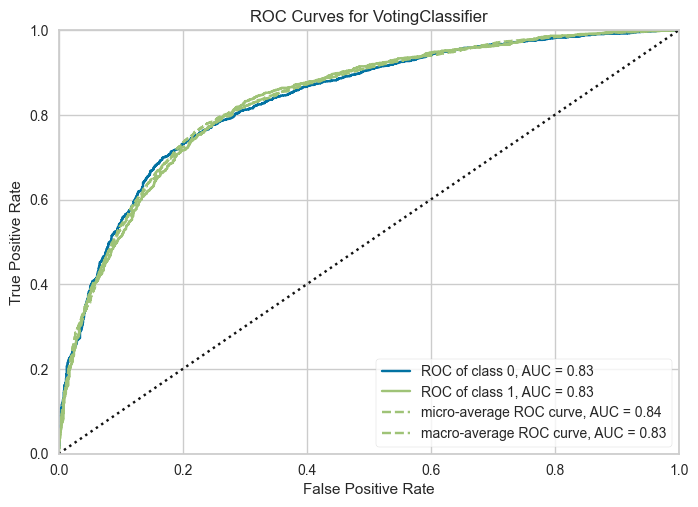

In [88]:
plot_model(blended)

In [89]:
# blended = blend_models(estimator_list = best_1, fold = 5, method = 'soft')

In [90]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7701,0.8344,0.8279,0.7666,0.7961,0.5334,0.5355


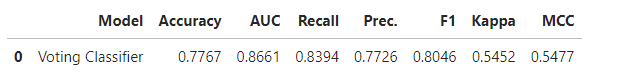

In [91]:
final_model = finalize_model(blended)

In [92]:
predictions = predict_model(final_model, data = test)

In [93]:
predictions['Score']

0        0.5498
1        0.8563
2        0.8669
3        0.6120
4        0.8080
          ...  
35447    0.8212
35448    0.8467
35449    0.9443
35450    0.6265
35451    0.6855
Name: Score, Length: 35452, dtype: float64

In [94]:
predictions['Label']

0        0
1        1
2        1
3        1
4        1
        ..
35447    1
35448    1
35449    1
35450    0
35451    1
Name: Label, Length: 35452, dtype: int32

In [95]:
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']

In [96]:
predictions['Score']

0        0.4502
1        0.8563
2        0.8669
3        0.6120
4        0.8080
          ...  
35447    0.8212
35448    0.8467
35449    0.9443
35450    0.3735
35451    0.6855
Name: Score, Length: 35452, dtype: float64

In [97]:
sub = predictions['Score']

In [98]:
sub

0        0.4502
1        0.8563
2        0.8669
3        0.6120
4        0.8080
          ...  
35447    0.8212
35448    0.8467
35449    0.9443
35450    0.3735
35451    0.6855
Name: Score, Length: 35452, dtype: float64

In [99]:
submission = pd.read_csv('./data/sample_submission.csv')

submission['nerdiness'] = sub

In [100]:
submission

,index,nerdiness
0,0,0.4502
1,1,0.8563
2,2,0.8669
3,3,0.6120
4,4,0.8080
...,...,...
35447,35447,0.8212
35448,35448,0.8467
35449,35449,0.9443
35450,35450,0.3735


In [101]:
submission.to_csv("./submit/submit7.csv", index = False)